# Pymaceuticals Inc.
---

### Analysis

- Background

Pymaceuticals, Inc., a new pharmaceutical company that specializes in anti-cancer medications, began screening for potential treatments for squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.

In this study, 249 mice who were identified with SCC tumors received treatment with a range of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens.

Below is a high level summary followed by all of the tables and figures needed for the technical report of the clinical study. 

- High level summary

Drug Regimens Capomulin and Ramicane reported the lowest average tumor volume and standard deviation across the study. This suggests Capomlin and Ramincane drug regimens had a greater impact on tumor volume than the other drug regimens. 

Based on the analysis, the sex of the mouse was not a factor in this study as the distribution of males to females is 51% to 49%. Further analysis could be performed to determine if sex was a factor in the drug regimen. 

Foucusing solely on the Capomulin regimen, it was noted that the higher the weight of the mouse in the study the larger the volume of the tumor on average. The corrleation was quite strong at .84 when comparing the weight of the mouse and its average tumor volume. 

Again, focusing solely on the Capomulin regimen and for one particular mouse, it was noted the mouse had a steady increase in tumor volume from 0 to 20 days. Then, between 20 and 30 days there was a sigificant drop with a small uptick at 30 days. Then there was another significant drop between 30-35 days on the drug regiment with another uptick after. This suggests a lead time in the effectiveness of the Capomulin drug at around 20 days. A longer term study would be beneficial to see if the increase in tumor size would continue in an unfavorable way.

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
combined_df.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [2]:
# Checking the number of mice.
len(mouse_metadata["Mouse ID"])

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_duplicate = combined_df[combined_df.duplicated(["Mouse ID", "Timepoint"], keep = False)]
mice_duplicate["Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_duplicate

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   

         Sex  Age_months  Weight (g)  
107   Female          21          26  
137   Female          21          26  
329   Female          21          26  
360   Female          21          26  
620   Female          21          26  
681   Female          21          26  
815   Female          21          26  
869   Female          21          26  
950   Female          21          26  
1111  Female          21          26

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_clean_df = combined_df.drop(combined_df.loc[combined_df["Mouse ID"]=="g989"].index)
combined_clean_df.head()


Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [6]:
# Checking the number of mice in the clean DataFrame.
len(combined_clean_df["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor = combined_clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
medium_tumor = combined_clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance_tumor = combined_clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_tumor = combined_clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_tumor = combined_clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.
stat_summary = pd.DataFrame({"Mean Tumor Volume":mean_tumor,
                             "Median Tumor Volume":medium_tumor,
                             "Tumor Volume Variance":variance_tumor,
                             "Tumor Volume Std. Dev.":std_tumor,
                             "Tumor Volume Std. Err.":sem_tumor})
stat_summary

Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume Std. Err.  
Drug Regimen                                                  
Capomulin                   4.994774                0.329346  
Ceftamin                    6.268188                0.469821  
Infubinol                   6.567243                0.492236  
Ketapril                    8.279709                0.603860  
Naftisol                    8.134708                0.596466  
Placebo                     7.821003                0.581331  
Propriva                    6.622085                0.544332  
Ramicane                    4.846308                0.320955  
Stelasyn                    7.710419                0.573111  
Zoniferol                   6.966589                0.516398

In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_stat_summary = combined_clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean"
                                                                ,"median","var","std","sem"]})
agg_stat_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

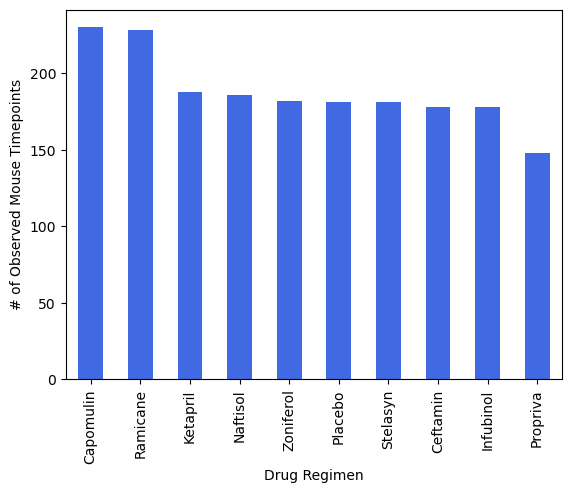

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_type = combined_clean_df.groupby("Drug Regimen")
drug_count = drug_type["Drug Regimen"].count().sort_values(ascending=False)
drug_count.plot(kind="bar", color="royalblue")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

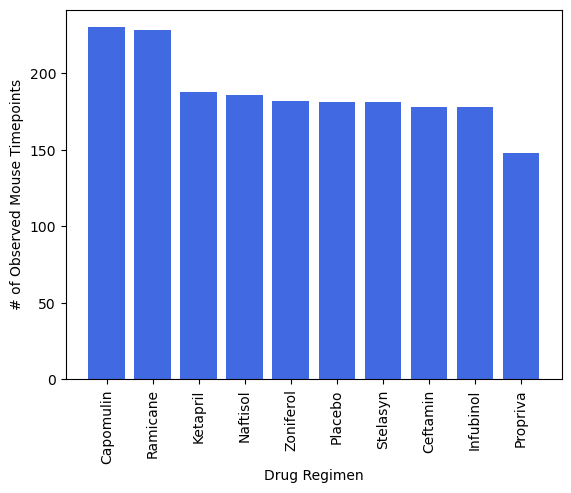

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drug_count.index,drug_count.values, color="royalblue")
plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show

<Axes: ylabel='Sex'>

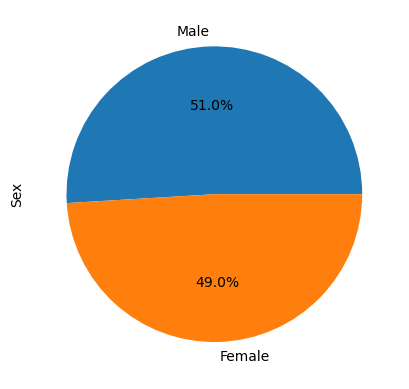

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_type = combined_clean_df.groupby("Sex")
sex_count = sex_type["Sex"].count().sort_values(ascending=False)
sex_count.plot(kind="pie", autopct="%1.1f%%")

<function matplotlib.pyplot.show(close=None, block=None)>

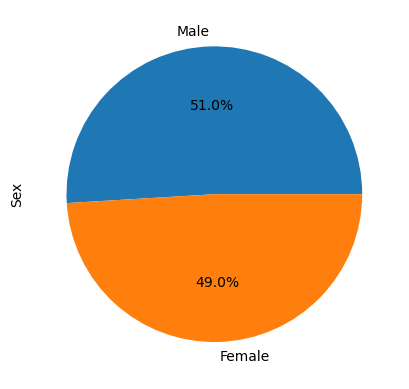

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_count,labels=sex_count.index, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = combined_clean_df.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_df = pd.merge(combined_clean_df, last_timepoint, on=["Mouse ID","Timepoint"],how="right")




In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane","Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    treatment_row = merge_df.loc[merge_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol.append(treatment_row)

    # Determine outliers using upper and lower bounds
for mouse, treatment in enumerate(treatments):
    
    quartiles = tumor_vol[mouse].quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    potential_outliers = tumor_vol[mouse][(tumor_vol[mouse] < lower_bound) | (tumor_vol[mouse] > upper_bound)]
    
    #Print the potential outliers calculated above
    print(f"{treatment}'s potential outliers: {potential_outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


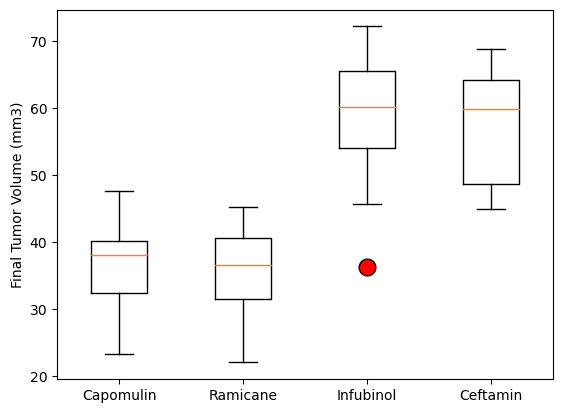

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol, labels=treatments, flierprops={"marker": "o","markersize":12,
                                                                     "markerfacecolor": "red"})
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

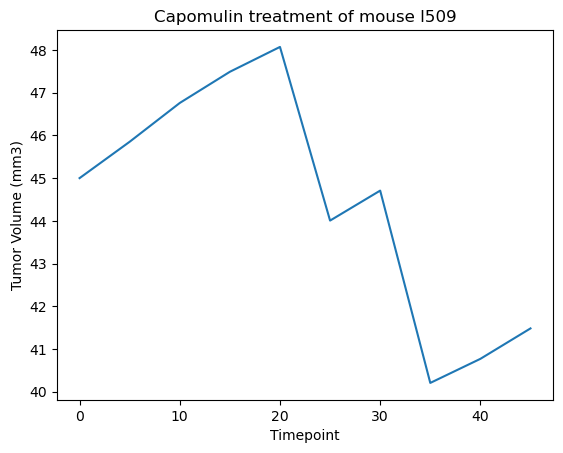

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter the data to only show data for Mouse ID l509
mouse_509 = combined_clean_df[combined_clean_df["Mouse ID"] == "l509"]
# Plot Mouse ID l509 data to its tumor volume over time under the Capomulin regimen
plt.plot(mouse_509["Timepoint"], mouse_509["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show

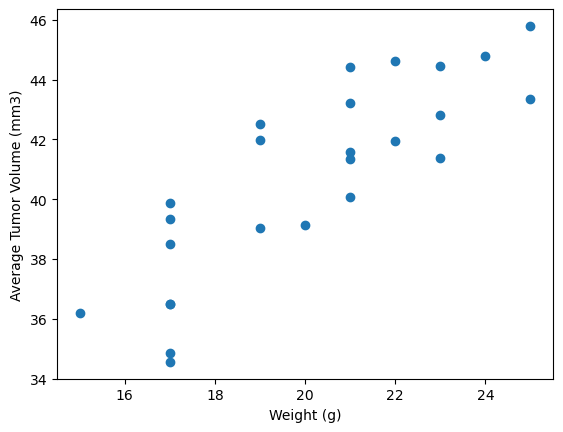

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#Filter the data to only include data from Capomulin Drug Regimen
Capomulin_df = combined_clean_df[combined_clean_df["Drug Regimen"] == "Capomulin"]
#Group data by mouse weight/ID and average the tumor volumes across the Capoumlin regimen data
grouped_capomulin = Capomulin_df.groupby(["Weight (g)", "Mouse ID"])["Tumor Volume (mm3)"].mean().reset_index()
#Set Variables for the weight and tumor size to simply code
weight = grouped_capomulin["Weight (g)"]
tumor = grouped_capomulin["Tumor Volume (mm3)"]
#create and show scattor plot for weight on the x axis and average tumor volume on the y axis
plt.scatter(weight, tumor)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


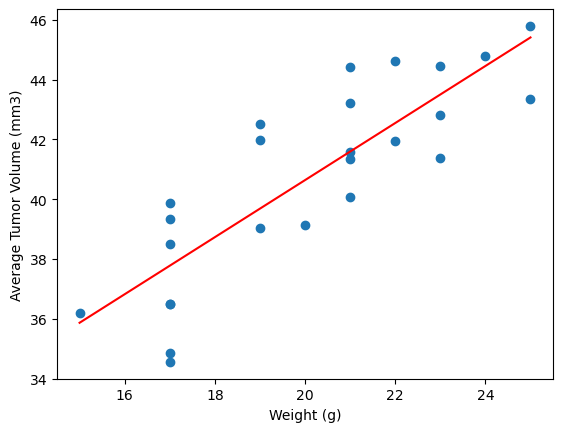

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Use the Pearson correlation coefficient to calculate and print the correlation between mouse 
# weight and tumor size. Correlations range from -1 to 1 with 0 implying no correlation.
correlation = st.pearsonr(weight, tumor)
print(f'The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}')
# Perform a linear regression on weight versious average tumor size
pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(weight, tumor)
# Create equation of regression line
pe_fit = pe_slope * weight + pe_int
# Plot and show the linear model on top of the weight vs. average tumor size scatter plot
plt.scatter(weight, tumor)
plt.plot(weight, pe_fit, "-", color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()